### Load Libraries and data head

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
#from sklearn. ensemble import HistGradientBoostingClassifier

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
from sklearn import metrics

## Upload the data set

In [4]:
CFL_lottery = pd.read_csv(r'CFL_lottery.csv')

In [5]:
CFL_lottery.head()

,Weekday,Date,Pick1,Pick2,Pick3,Pick4,Pick5,CB,Winners,WinnerLocation,LotteryRetailer,RetailerCity,Prize,PayoutOption,PrizeAmount,QuickPick,WinningTickets,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Wednesday,8/24/2022,7.0,15.0,33.0,42.0,53.0,4.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,8/23/2022,6.0,20.0,21.0,34.0,49.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Monday,8/22/2022,5.0,14.0,48.0,51.0,57.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sunday,8/21/2022,2.0,21.0,30.0,48.0,58.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Saturday,8/20/2022,13.0,23.0,37.0,57.0,60.0,1.0,Y,"HOLIDAY, FL 34691",1552 7-ELEVEN 32852,"3437 US HIGHWAY 19, HOLIDAY","$1,000_WEEK",CASH OPTION,1000000.0,Y,1.0,NaN,NaN,NaN


In [6]:
CFL_lottery

,Weekday,Date,Pick1,Pick2,Pick3,Pick4,Pick5,CB,Winners,WinnerLocation,LotteryRetailer,RetailerCity,Prize,PayoutOption,PrizeAmount,QuickPick,WinningTickets,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Wednesday,8/24/2022,7.0,15.0,33.0,42.0,53.0,4.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,8/23/2022,6.0,20.0,21.0,34.0,49.0,2.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Monday,8/22/2022,5.0,14.0,48.0,51.0,57.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sunday,8/21/2022,2.0,21.0,30.0,48.0,58.0,1.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Saturday,8/20/2022,13.0,23.0,37.0,57.0,60.0,1.0,Y,"HOLIDAY, FL 34691",1552 7-ELEVEN 32852,"3437 US HIGHWAY 19, HOLIDAY","$1,000_WEEK",CASH OPTION,1000000.0,Y,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Supervised Machine Learning

### Data Wrangling

In [7]:
def recode (day):
    if day == "Monday":
        return 1
    if day == "Tuesday":
        return 2
    if day == "Wednesday":
        return 3
    if day == "Thursday":
        return 4
    if day == "Friday":
        return 5
    if day == "Saturday":
        return 6
    if day == "Sunday":
        return 7
CFL_lottery['Weekdayr'] = CFL_lottery['Weekday'].apply(recode)

In [8]:
def recode (Wins):
    if Wins == "N":
        return 1
    if Wins == "Y":
        return 2
CFL_lottery['Winnersr'] = CFL_lottery['Winners'].apply(recode)

In [9]:
CFL_lottery.head()

,Weekday,Date,Pick1,Pick2,Pick3,Pick4,Pick5,CB,Winners,WinnerLocation,...,Prize,PayoutOption,PrizeAmount,QuickPick,WinningTickets,Unnamed: 17,Unnamed: 18,Unnamed: 19,Weekdayr,Winnersr
0,Wednesday,8/24/2022,7.0,15.0,33.0,42.0,53.0,4.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
1,Tuesday,8/23/2022,6.0,20.0,21.0,34.0,49.0,2.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,Monday,8/22/2022,5.0,14.0,48.0,51.0,57.0,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,Sunday,8/21/2022,2.0,21.0,30.0,48.0,58.0,1.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0
4,Saturday,8/20/2022,13.0,23.0,37.0,57.0,60.0,1.0,Y,"HOLIDAY, FL 34691",...,"$1,000_WEEK",CASH OPTION,1000000.0,Y,1.0,NaN,NaN,NaN,6.0,2.0


#CFL_lottery = CFL_lottery.dropna()

## Picking the x and y variables 

### X variable

In [10]:
CFL_lottery = CFL_lottery[['Weekdayr', 'Pick2', 'Pick3','CB', 'Pick4', 'Winnersr','Pick1']].dropna()
x = CFL_lottery[['Weekdayr', 'Pick2', 'Pick3','CB', 'Pick4', 'Winnersr']]

#x.dropna()

### Y variable

In [11]:
y = CFL_lottery['Pick1']

#x.info()

#y.info()

### Train Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(838, 6) (838,)
(559, 6) (559,)


### Create Linear Regression

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### Exam Prediction

In [15]:
predictions = lm.predict(x_test)
predictions

array([20.97298187,  9.7316563 ,  8.93789973,  6.75014618,  3.12584528,
       16.97170001, 11.36029654, 15.57880548,  6.65279138, 23.68913145,
       15.97316436,  8.2121375 ,  4.88872626,  7.08594863, 14.06597623,
       11.44223793, 12.61036324, 12.75837404,  3.11843497,  6.71382517,
        8.10306988,  8.55075944,  9.42431655, 18.01391747, 15.1502051 ,
        4.49202184,  1.76018719, 16.97829424,  8.38578414,  3.26012062,
        6.09208374, 11.02559479,  4.07552285,  1.60907789,  6.80510661,
       13.05949258,  6.19479834,  5.96280575,  4.97326563, 22.20511326,
       15.68396911, 16.73020142,  9.71815036,  6.02702149, 14.45965822,
       11.67518339, 18.28741229, 12.46184198, 10.58575793, 11.12693528,
       17.59988287,  2.54815199,  4.04674958,  3.51427255,  9.96344356,
       15.97979576, 12.16638164, 14.13802434,  4.71128565,  7.11370979,
       12.36804961, 23.75505366, 16.12639032, 19.45763071,  7.50861308,
        8.90191283, 18.35189969, 20.09800853, 21.87551279, 13.70

### Graphing Predictions

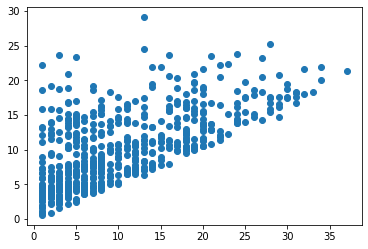

In [16]:
plt.scatter(y_test, predictions)

### Accuracy Score

In [17]:
print("Score:", lm.score(x_test, y_test))

Score: 0.3998835742540603


#### It is low

### Mean Absolute Mean

In [18]:
metrics.mean_absolute_error(y_test, predictions)

4.65957783798178

### Mean Squared Error

In [19]:
metrics.mean_squared_error(y_test, predictions)

37.59296788269808

### Rooted Mean Squared Error

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

6.131310453948494